**DSBDA MINI PROJECT - Data Analysis And Visualization of Global CO2 Emission**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**DATA PREPROCESSINGt**

**DHRUV GIDWANI**

In [ ]:
try:
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSBDA/CO2 emission by countries.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSBDA/CO2 emission by countries.csv", encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSBDA/CO2 emission by countries.csv", encoding='ISO-8859-1')

In [ ]:
df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Country                   0
Code                   2168
Calling Code           3523
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
dtype: int64


In [ ]:
print("Data types:\n", df.dtypes)

Data types:
 Country                 object
Code                    object
Calling Code            object
Year                     int64
CO2 emission (Tons)    float64
Population(2022)       float64
Area                   float64
% of World              object
Density(km2)            object
dtype: object


In [ ]:
print("Summary statistics:\n", df.describe())

Summary statistics:
                Year  CO2 emission (Tons)  Population(2022)          Area
count  59620.000000         5.962000e+04      5.311600e+04  5.528400e+04
mean    1885.000000         1.034774e+09      3.992260e+07  6.522073e+05
std       78.231085         1.041652e+10      1.482365e+08  1.865483e+06
min     1750.000000         0.000000e+00      1.131200e+04  2.100000e+01
25%     1817.000000         0.000000e+00      1.770414e+06  1.770450e+04
50%     1885.000000         0.000000e+00      8.673095e+06  1.103815e+05
75%     1953.000000         8.715092e+06      2.862920e+07  4.925730e+05
max     2020.000000         4.170000e+11      1.425887e+09  1.709824e+07


In [ ]:
df.isnull().sum()

Country                   0
Code                   2168
Calling Code           3523
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
dtype: int64

In [ ]:
df.shape

(59620, 9)

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Country                0
Code                   0
Calling Code           0
Year                   0
CO2 emission (Tons)    0
Population(2022)       0
Area                   0
% of World             0
Density(km2)           0
dtype: int64

In [ ]:
df.describe()

,Year,CO2 emission (Tons),Population(2022),Area
count,48509.000000,4.850900e+04,4.850900e+04,4.850900e+04
mean,1885.000000,1.160748e+09,4.186199e+07,6.328071e+05
std,78.231235,1.125903e+10,1.545682e+08,1.551563e+06
min,1750.000000,0.000000e+00,1.131200e+04,2.100000e+01
25%,1817.000000,0.000000e+00,2.305825e+06,2.633800e+04
50%,1885.000000,0.000000e+00,9.038309e+06,1.303730e+05
75%,1953.000000,1.660158e+07,3.054758e+07,5.516950e+05
max,2020.000000,4.170000e+11,1.425887e+09,9.984670e+06


In [ ]:
df.shape

(48509, 9)

In [ ]:
#Fill the Null values
df['Population(2022)'].fillna(df['Population(2022)'].mean(), inplace=True)
df['Area'].fillna(df['Area'].mean(), inplace=True)

**LABEL ENCODING & DATA TRANSFORMATION**

**DEEP ISANE**

In [ ]:
# Select columns of a specific data type
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
categorical_columns = df.select_dtypes(include=['object'])

In [ ]:
numeric_columns

,Year,CO2 emission (Tons),Population(2022),Area
0,1750,0.0,41128771.0,652230.0
1,1751,0.0,41128771.0,652230.0
2,1752,0.0,41128771.0,652230.0
3,1753,0.0,41128771.0,652230.0
4,1754,0.0,41128771.0,652230.0
...,...,...,...,...
59615,2016,736467042.0,16320537.0,390757.0
59616,2017,746048675.0,16320537.0,390757.0
59617,2018,757903042.0,16320537.0,390757.0
59618,2019,768852126.0,16320537.0,390757.0


In [ ]:
categorical_columns

,Country,Code,Calling Code,% of World,Density(km2)
0,Afghanistan,AF,93,0.40%,63/km²
1,Afghanistan,AF,93,0.40%,63/km²
2,Afghanistan,AF,93,0.40%,63/km²
3,Afghanistan,AF,93,0.40%,63/km²
4,Afghanistan,AF,93,0.40%,63/km²
...,...,...,...,...,...
59615,Zimbabwe,ZW,263,0.30%,42/km²
59616,Zimbabwe,ZW,263,0.30%,42/km²
59617,Zimbabwe,ZW,263,0.30%,42/km²
59618,Zimbabwe,ZW,263,0.30%,42/km²


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['Country_Encoded'] = label_encoder.fit_transform(df['Country'])

In [ ]:
df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Country_Encoded
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²,0
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²,0
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²,0
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²,0
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²,0


In [ ]:
unique_sum = df['Country'].nunique()
print("Sum of unique values in 'Country' column:", unique_sum)

Sum of unique values in 'Country' column: 179


In [ ]:
# Drop the 'Code' column from the DataFrame
df.drop(columns=['Code'], inplace=True)

In [ ]:
df.head()

,Country,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Country_Encoded
0,Afghanistan,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²,0
1,Afghanistan,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²,0
2,Afghanistan,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²,0
3,Afghanistan,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²,0
4,Afghanistan,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²,0


In [ ]:
df['Calling Code'] = pd.to_numeric(df['Calling Code'], errors='coerce')
df['% of World'] = pd.to_numeric(df['% of World'].str.rstrip('%'), errors='coerce')
df['Density(km2)'] = pd.to_numeric(df['Density(km2)'].str.replace('/km²', ''), errors='coerce')

In [ ]:
df.head()

,Country,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Country_Encoded
0,Afghanistan,93.0,1750,0.0,41128771.0,652230.0,0.4,63.0,0
1,Afghanistan,93.0,1751,0.0,41128771.0,652230.0,0.4,63.0,0
2,Afghanistan,93.0,1752,0.0,41128771.0,652230.0,0.4,63.0,0
3,Afghanistan,93.0,1753,0.0,41128771.0,652230.0,0.4,63.0,0
4,Afghanistan,93.0,1754,0.0,41128771.0,652230.0,0.4,63.0,0


In [ ]:
df.dtypes

Country                 object
Calling Code           float64
Year                     int64
CO2 emission (Tons)    float64
Population(2022)       float64
Area                   float64
% of World             float64
Density(km2)           float64
Country_Encoded          int64
dtype: object

**DATA VISUALIZATION**

**PRANAV JAWALE , OMKAR AHER**

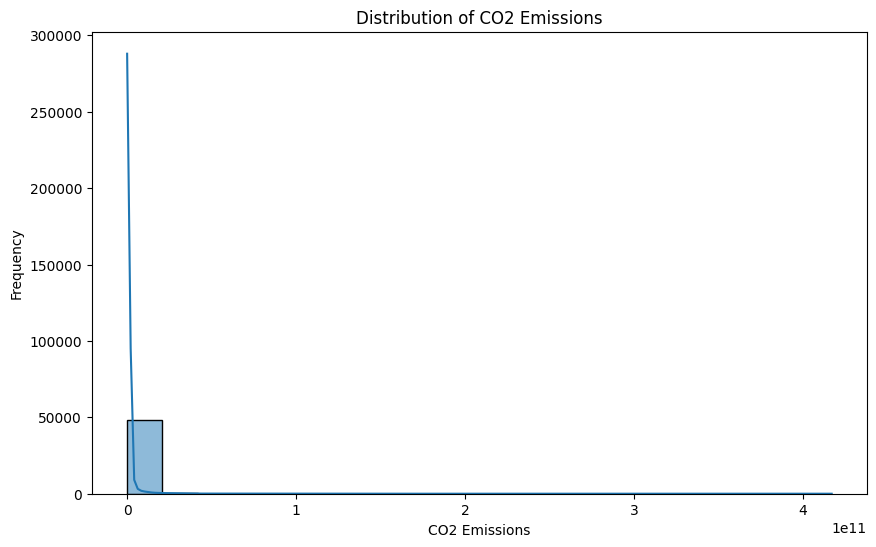

In [ ]:
#Bar plot to visualize top 10 emitters:
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 emission (Tons)'], bins=20, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()


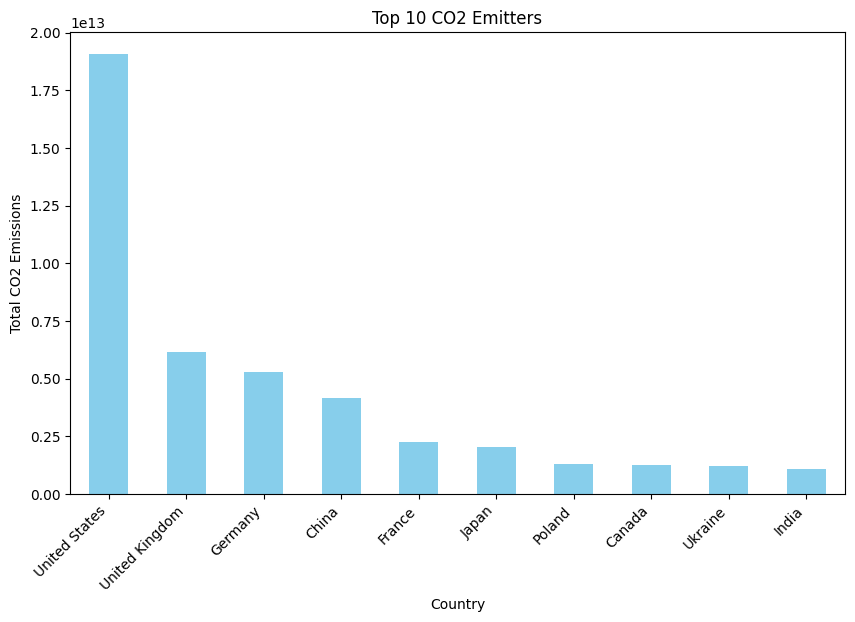

In [ ]:
#Line plot to visualize trend of CO2 emissions over years:
plt.figure(figsize=(10, 6))
top_10_emitters = df.groupby('Country')['CO2 emission (Tons)'].sum().nlargest(10)
top_10_emitters.plot(kind='bar', color='skyblue')
plt.title('Top 10 CO2 Emitters')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.xticks(rotation=45, ha='right')
plt.show()


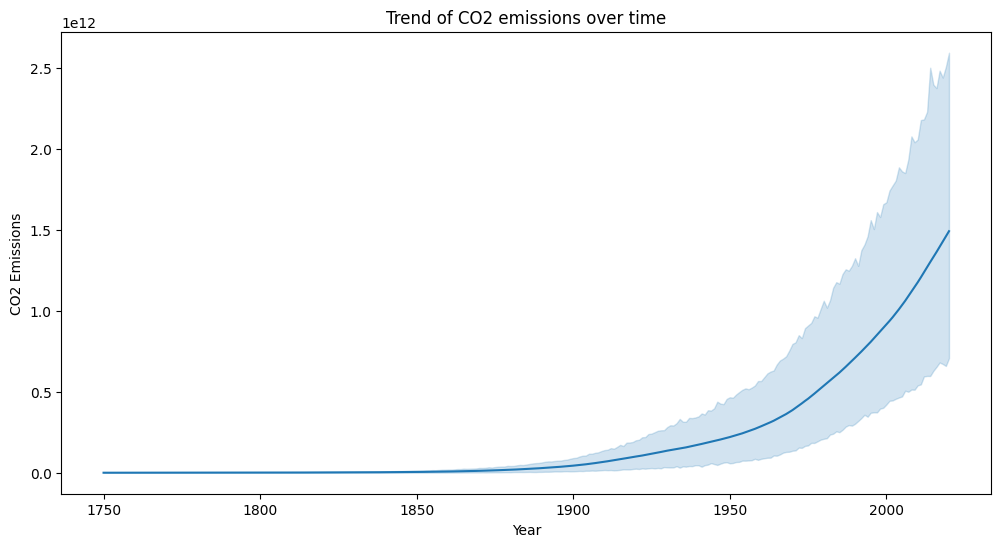

In [ ]:
#plot to visualize relationship between CO2 emissions and population:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='CO2 emission (Tons)', estimator='sum')
plt.title('Trend of CO2 emissions over time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.show()


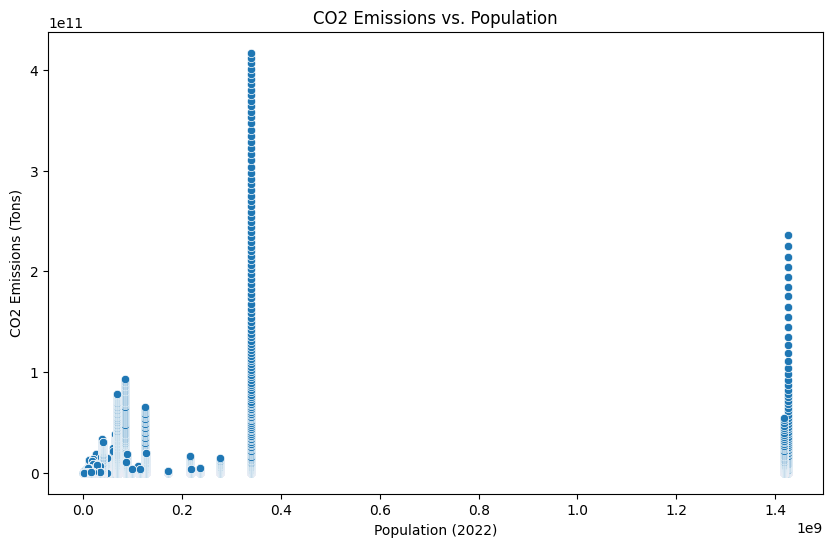

In [ ]:
#plot to visualize distribution of CO2 emissions by country:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population(2022)', y='CO2 emission (Tons)')
plt.title('CO2 Emissions vs. Population')
plt.xlabel('Population (2022)')
plt.ylabel('CO2 Emissions (Tons)')
plt.show()


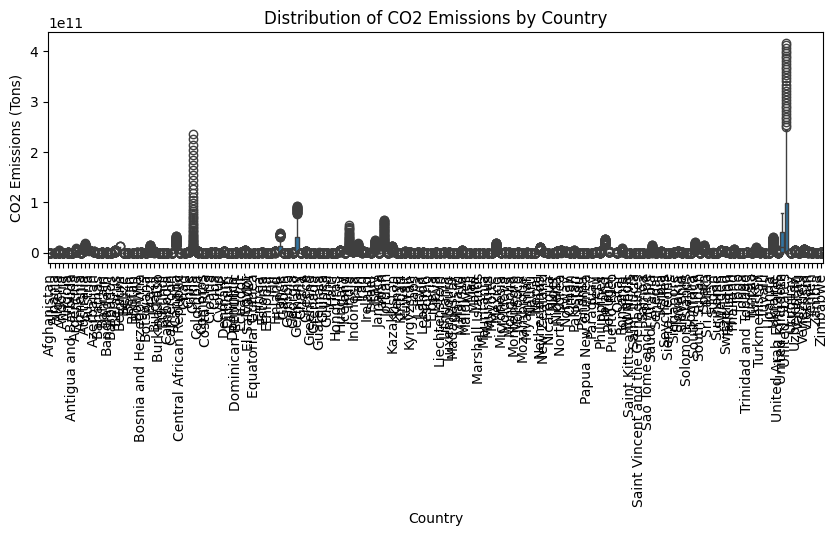

In [ ]:
#Box plot to visualize distribution of CO2 emissions by country:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x='Country', y='CO2 emission (Tons)')
plt.title('Distribution of CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (Tons)')
plt.xticks(rotation=90)
plt.show()


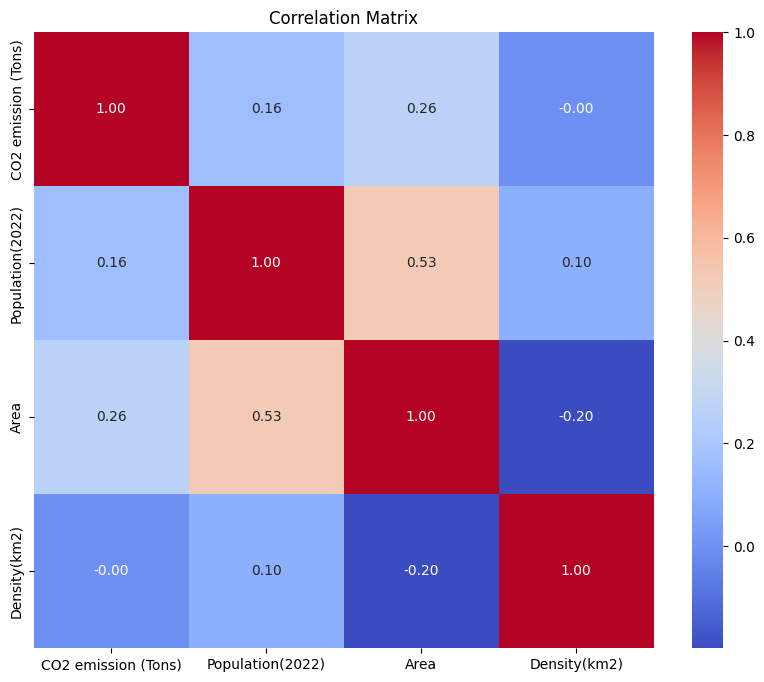

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['CO2 emission (Tons)', 'Population(2022)', 'Area', 'Density(km2)']].corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Total CO2 emissions by country(First 5)
total_emissions_by_country = df.groupby('Country')['CO2 emission (Tons)'].sum()
print(total_emissions_by_country[:5])

# Average CO2 emissions by year(First 5)
average_emissions_by_year = df.groupby('Year')['CO2 emission (Tons)'].mean()
print(average_emissions_by_year[:5])

# Total CO2 emissions by year(First 5)
total_emissions_by_year = df.groupby('Year')['CO2 emission (Tons)'].sum()
print(total_emissions_by_year[:5])


Country
Afghanistan    3.754106e+09
Albania        9.250246e+09
Algeria        9.582024e+10
Andorra        2.360722e+08
Angola         1.143158e+10
Name: CO2 emission (Tons), dtype: float64
Year
1750     52237.586592
1751    104475.173184
1752    156733.229050
1753    208991.284916
1754    261269.810056
Name: CO2 emission (Tons), dtype: float64
Year
1750     9350528.0
1751    18701056.0
1752    28055248.0
1753    37409440.0
1754    46767296.0
Name: CO2 emission (Tons), dtype: float64


In [ ]:
# Total CO2 emissions by country
total_emissions_by_country = df.groupby("Country")["CO2 emission (Tons)"].sum().sort_values(ascending=False)

# Average CO2 emissions per capita by country
df["CO2_emission_per_capita"] = df["CO2 emission (Tons)"] / df["Population(2022)"]
average_emissions_per_capita = df.groupby("Country")["CO2_emission_per_capita"].mean().sort_values(ascending=False)
print(average_emissions_per_capita)

Country
United Kingdom    336.819255
Belgium           250.196083
Germany           234.607068
United States     208.000489
Estonia           176.211194
                     ...    
Niger               0.130255
Ethiopia            0.127935
Chad                0.101320
Burundi             0.077897
Puerto Rico         0.023932
Name: CO2_emission_per_capita, Length: 179, dtype: float64


 **BUILDING PREDICTION MODEL**

 **CHINMAY**

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
print(df.head())

       Country  Calling Code  Year  CO2 emission (Tons)  Population(2022)  \
0  Afghanistan          93.0  1750                  0.0        41128771.0   
1  Afghanistan          93.0  1751                  0.0        41128771.0   
2  Afghanistan          93.0  1752                  0.0        41128771.0   
3  Afghanistan          93.0  1753                  0.0        41128771.0   
4  Afghanistan          93.0  1754                  0.0        41128771.0   

       Area  % of World  Density(km2)  Country_Encoded  \
0  652230.0         0.4          63.0                0   
1  652230.0         0.4          63.0                0   
2  652230.0         0.4          63.0                0   
3  652230.0         0.4          63.0                0   
4  652230.0         0.4          63.0                0   

   CO2_emission_per_capita  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  


In [ ]:
print(df['Country_Encoded'].nunique())

179


In [ ]:
print(numeric_columns.corr())

                             Year  CO2 emission (Tons)  Population(2022)  \
Year                 1.000000e+00             0.134150     -7.233739e-15   
CO2 emission (Tons)  1.341501e-01             1.000000      1.611472e-01   
Population(2022)    -7.233739e-15             0.161147      1.000000e+00   
Area                -1.120522e-14             0.262216      5.254822e-01   

                             Area  
Year                -1.120522e-14  
CO2 emission (Tons)  2.622159e-01  
Population(2022)     5.254822e-01  
Area                 1.000000e+00  


In [ ]:
X = df[["Year", "Population(2022)"]]
y = df["CO2 emission (Tons)"]

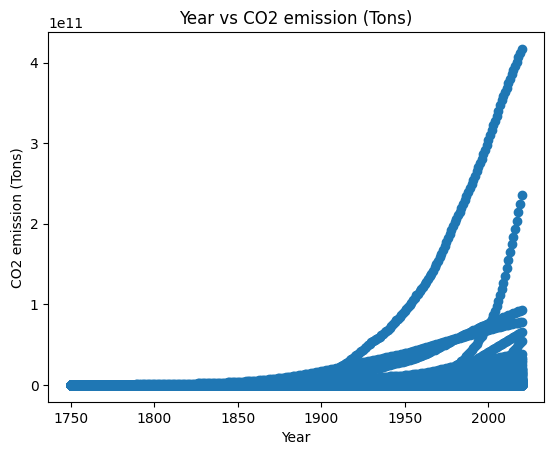

In [ ]:
# Plot Year against CO2 emission (Tons)
plt.scatter(X['Year'], y)
plt.xlabel('Year')
plt.ylabel('CO2 emission (Tons)')
plt.title('Year vs CO2 emission (Tons)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([-6.18290346e+08,  7.61704583e+08,  2.57100939e+09, ...,
        3.60970282e+09,  2.77131983e+08,  6.82118759e+08])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.923505065747443e+20
